# V Nagasai (CS20B1016)

`Assignment - 3`

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 1905.5, 1237.5, -0.5)

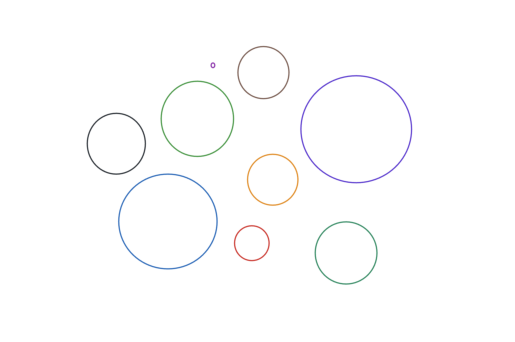

In [2]:
image = cv2.imread("img-circles.png")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1905.5, 1237.5, -0.5)

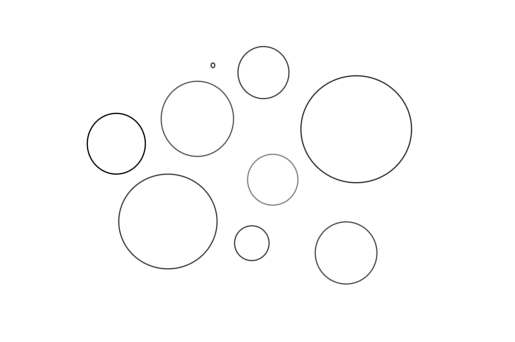

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")
plt.axis('off')

(-0.5, 1905.5, 1237.5, -0.5)

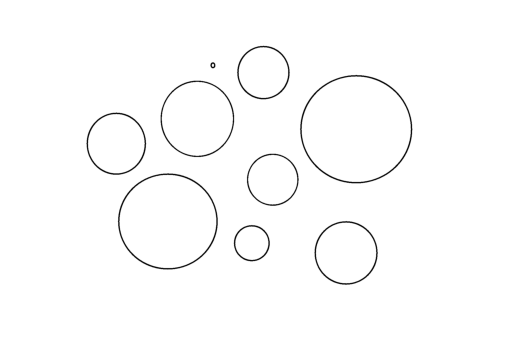

In [4]:
tup,thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1905.5, 1237.5, -0.5)

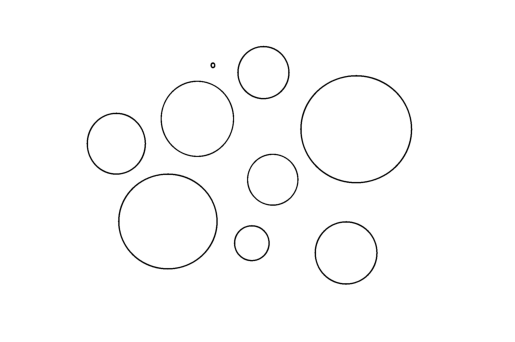

In [5]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
plt.imshow(cv2.cvtColor(opening,cv2.COLOR_BGR2RGB))
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1905.5, 1237.5, -0.5)

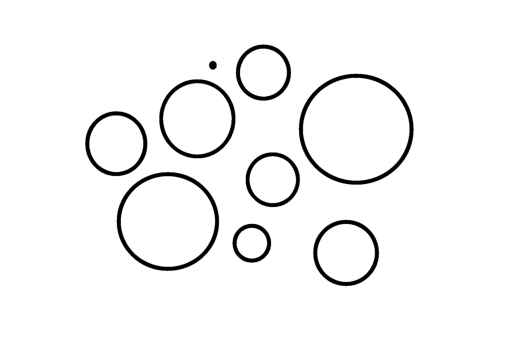

In [6]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
val, sure_fg = cv2.threshold(dist_transform, 0.01 * dist_transform.max(), 255, 0)
plt.imshow(cv2.cvtColor(sure_fg,cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1905.5, 1237.5, -0.5)

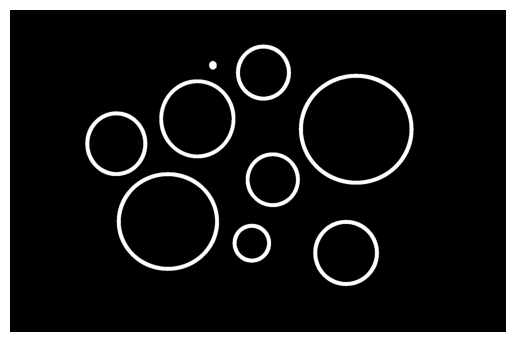

In [7]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(cv2.cvtColor(unknown,cv2.COLOR_BGR2RGB))
plt.axis('off')

In [8]:
val2, markers = cv2.connectedComponents(sure_fg)
print(val2)

10


(-0.5, 1905.5, 1237.5, -0.5)

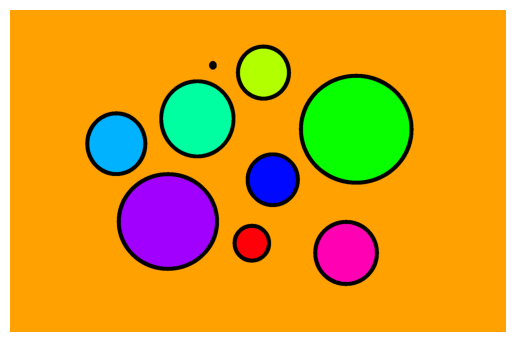

In [9]:
label_hue = np.uint8(179*markers/np.max(markers))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
  # cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
  # set bg label to black
labeled_img[label_hue==0] = 0

plt.imshow(cv2.cvtColor(labeled_img,cv2.COLOR_BGR2RGB))
plt.axis('off')

In [10]:
markers[unknown == 255] = 0


In [11]:
cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]


In [12]:
num_points = len(np.unique(markers)) - 1

print(f"Number of points: {num_points}")

Number of points: 9


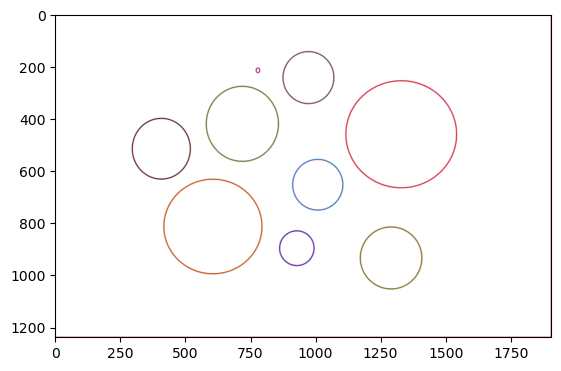

In [13]:
plt.imshow(image)